In [ ]:
#Uploading the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.image as image
from matplotlib import pyplot
from random import randint

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn; sn.set(font_scale=1.0)

In [ ]:
BASE_DIR='/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset'
B_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
M_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
N_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Normal cases'

In [ ]:
#Encoding the classes
class_map = {
    'Bengin cases': 1,
    'Malignant cases': 2,
    'Normal cases': 3,
}
in_class_map = {
    1:'Bengin cases',
    2:'Malignant cases',
    3: 'Normal cases',
}

In [ ]:
label_list = ['Bengin cases','Malignant cases','Normal cases']

In [ ]:
def get_label(class_code):
    return in_class_map[class_code]

In [ ]:
def get_images_wo_aug(directory):
  IMAGES = []
  LABELS = []
  l1 = ['Malignant cases' , 'Normal cases']
  for labels in l1:
    folderPath = os.path.join(BASE_DIR, labels)
    for image_file in tqdm(os.listdir(folderPath)):
      # print(image_file)
      image = cv2.imread(os.path.join(folderPath, image_file))
      image = cv2.resize(image,(150,150))
      IMAGES.append(image)
      LABELS.append(class_map[labels])

  return shuffle(IMAGES,LABELS,random_state=8)

In [ ]:
def get_images_aug():
  IMAGES1 = []
  LABELS1 = []
  folderPath='/content/drive/MyDrive/In-Med/Augmented'
  for image_file in tqdm(os.listdir(folderPath)):
    # print(image_file)
    image = cv2.imread(os.path.join(folderPath, image_file))
    image = cv2.resize(image,(150,150))
    IMAGES1.append(image)
    LABELS1.append(0)

  return shuffle(IMAGES1,LABELS1,random_state=8)

In [ ]:
IMAGES=[]
LABELS=[]
IMAGES1=[]
LABELS1=[]

In [ ]:
IMAGES, LABELS = get_images_wo_aug('/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset')

100%|██████████| 427/427 [00:08<00:00, 49.23it/s] 


In [ ]:
IMAGES1, LABELS1 = get_images_aug()

100%|██████████| 544/544 [00:06<00:00, 87.19it/s] 


In [ ]:
images_list=[]
labels_list=[]

In [ ]:
images_list=IMAGES.copy()
labels_list=LABELS.copy()

In [ ]:
#Combining the augmented and non-augmented images
images_list.extend(IMAGES1)
labels_list.extend(LABELS1)

In [ ]:
X = np.array(images_list)
y = np.array(labels_list)

In [ ]:
#Spliting the dataset into train test
#Split percentage: train:80% test:20%
X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#####print(len(y_train)) 1225
#####print(len(y)) 1532

In [ ]:
print((X_train.shape,y_train.shape))

((1225, 150, 150, 3), (1225,))


In [ ]:
print((X_test.shape,y_test.shape))

((307, 150, 150, 3), (307,))


In [ ]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(1,1))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(1,1))
model.add(Layers.Flatten())
model.add(Layers.Dropout(rate=0.25))
model.add(Layers.Dense(6,activation='softmax'))

In [ ]:
#later
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained = model.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 49s 2s/step - loss: 15.0929 - accuracy: 0.3582 - val_loss: 1.9234 - val_accuracy: 0.5326
Epoch 2/35
27/27 [==============================] - 47s 2s/step - loss: 2.4685 - accuracy: 0.5251 - val_loss: 0.8945 - val_accuracy: 0.6603
Epoch 3/35
27/27 [==============================] - 48s 2s/step - loss: 1.0625 - accuracy: 0.6371 - val_loss: 0.6896 - val_accuracy: 0.7201
Epoch 4/35
27/27 [==============================] - 49s 2s/step - loss: 0.7243 - accuracy: 0.7130 - val_loss: 0.4770 - val_accuracy: 0.7799
Epoch 5/35
27/27 [==============================] - 47s 2s/step - loss: 0.6126 - accuracy: 0.7433 - val_loss: 0.4110 - val_accuracy: 0.8288
Epoch 6/35
27/27 [==============================] - 46s 2s/step - loss: 0.5206 - accuracy: 0.7806 - val_loss: 0.3820 - val_accuracy: 0.8397
Epoch 7/35
27/27 [==============================] - 49s 2s/step - loss: 0.4408 - accuracy: 0.7993 - val_loss: 0.3356 - val_accuracy: 0.8533
Epoch 8/35
27/27 [=

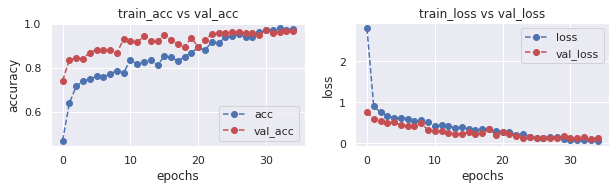

In [ ]:
plot_accuracy_loss(trained)

In [ ]:
test_loss = model.evaluate(X_test, y_test)

10/10 [==============================] - 7s 647ms/step - loss: 0.1052 - accuracy: 0.9739


In [ ]:
pred = model.predict(X_test)

10/10 [==============================] - 5s 535ms/step


In [ ]:
#later
pred_train = model.predict(X_train)

39/39 [==============================] - 21s 503ms/step


In [ ]:
#later
pred_labels_train = np.argmax(pred_train, axis = 1)

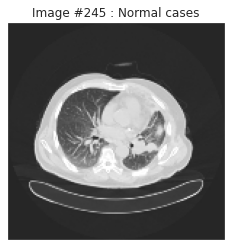

In [ ]:
pred_labels = np.argmax(pred, axis = 1)

display_random_image(label_list, X_test, pred_labels)

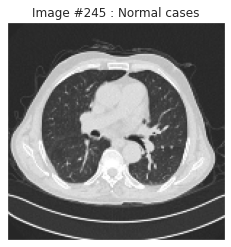

In [ ]:
plt.figure()
plt.imshow(X_test[285])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(245) + label_list[y_test[245]])
plt.show()

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels))

Accuracy =  0.9739413680781759


In [ ]:
#later
print ("Accuracy = ", metrics.accuracy_score(y_train, pred_labels_train))

Accuracy =  0.9885714285714285


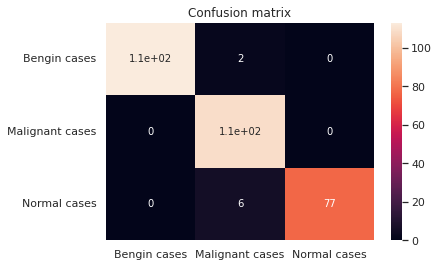

In [ ]:
#Confusion Matrix
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=label_list,
           yticklabels=label_list, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

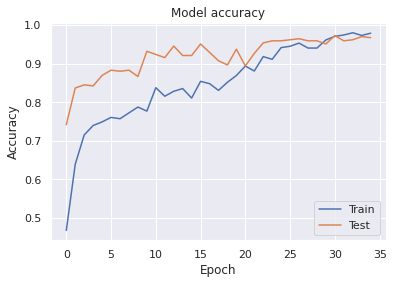

In [ ]:
#Train/Test Accuracy per epoch plot
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

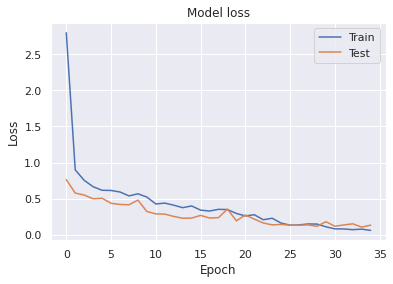

In [ ]:
#Train/Test Loss per epoch plot
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
#Classification Report
print(classification_report(y_test, pred_labels, target_names=label_list))

                 precision    recall  f1-score   support

   Bengin cases       1.00      0.98      0.99       115
Malignant cases       0.93      1.00      0.96       109
   Normal cases       1.00      0.93      0.96        83

       accuracy                           0.97       307
      macro avg       0.98      0.97      0.97       307
   weighted avg       0.98      0.97      0.97       307

